Lambda School Data Science

*Unit 4, Sprint 2, Module 2*

---

# Train (Prepare)
__*Neural Network Foundations*__

## Learning Objectives
* <a href="#p1">Part 1</a>: Student should be able to explain the intuition behind backpropagation and gradient descent
* <a href="#p2">Part 2</a>: Student should be able to discuss the importance of batch size
* <a href="#p3">Part 3</a>: Student should be able to discuss the importance of learning rate

## Recap of Previous Episode

Last lecture, we learned about some of the principal components of Neural Networks: Neurons, Weights, Activation Functions, and layers (input, output, & hidden). Today, we will reinforce our understanding of those components and introduce the mechanics of training a neural network. Feed-forward neural networks, such as multi-layer perceptrons (MLPs), are almost always trained using some variation of gradient descent where the gradient has been calculated by backpropagation.

  <center><img src="https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/main/module1-Architect/IMG_0167.jpeg" width=400></center>

- There are three kinds of layers: input, hidden, and output layers.
- Each layer is made up of **n** individual neurons (aka activation units) which have a corresponding weight and bias.
- Signal is passed from layer to layer through a network by:
 - Taking in inputs from the training data (or previous layer)
 - Multiplying each input by its corresponding weight (think arrow/connecting line)
 - Adding a bias to this weighted some of inputs and weights
 - Activating this weighted sum + bias by squishifying it with sigmoid or some other activation function. With a single perceptron with three inputs, calculating the output from the node is done like so:
\begin{align}
 y = sigmoid(\sum(weight_{1}input_{1} + weight_{2}input_{2} + weight_{3}input_{3}) + bias)
\end{align}
 - this final activated value is the signal that gets passed onto the next layer of the network.
 

#### *Record of the price guess game*:



# Training a Neural Network: **Trial and Error**
*Formal Summary*

0. Pick a network architecture
   - No. of input units = No. of features
   - No. of output units = Number of Classes (or expected targets)
   - Select the number of hidden layers and number of neurons within each hidden layer
1. Randomly **initialize weights**
2. Implement **forward propagation** to get $h_{\theta}(x^{(i)})$ for any $x^{(i)}$
3. Implement code to compute a **cost function** $J(\theta)$
4. Implement **backpropagation** to compute partial derivatives $\frac{\delta}{\delta\theta_{jk}^{l}}{J(\theta)}$
5. Use **gradient descent** (or other advanced optimizer) with backpropagation to minimize $J(\theta)$ as a function of parameters $\theta\$
6. Repeat steps 2 - 5 until cost function is 'minimized' or some other stopping criteria is met. One pass over steps 2 - 5 is called an iteration or epoch.

# Backpropagation & Gradient Descent (Learn)
<a id="p1"></a>

## What is Backpropagation

Backpropagation is short for ["Backwards Propagation of errors"](https://en.wikipedia.org/wiki/Backpropagation) and refers to a specific (rather calculus intensive) algorithm for how weights in a neural network are updated in reverse order at the end of each training epoch. Our purpose today is to demonstrate the backpropagation algorithm on a simple Feedforward Neural Network and in so doing help you get a grasp on the main process. If you want to understand all of the underlying calculus of how the gradients are calculated then you'll need to dive into it yourself, [3Blue1Brown's video is a great starting place](https://www.youtube.com/watch?v=tIeHLnjs5U8). I also highly recommend this Welch Labs series [Neural Networks Demystified](https://www.youtube.com/watch?v=bxe2T-V8XRs) if you want a rapid yet orderly walk through of the main intuitions and math behind the backpropagation algorithm. 

### What is a Gradient?

> In vector calculus, the gradient is a multi-variable generalization of the derivative. 

The gradients that we will deal with today will be vector representations of the derivative of the activation function. 

### Gradient Descent Formula 
This is a general formula for standard Gradient Descent. 
![](https://media.geeksforgeeks.org/wp-content/uploads/20200611183120/1406-7.png)

There are more sophisticated versions of gradient descent commonly referred to as [**Adaptive Gradient Descent**](https://ruder.io/optimizing-gradient-descent/). 


These adaptive models all build off of this simple equation, so it's best to first understand the standard form of Gradient Descent, then move on to more sophisticated versions. 

### Geometry of Gradient Descent 



<center><img src="https://i.stack.imgur.com/yk1mk.png" width=600></center>

## Convex vs. Non-Convex

Loss curves won't always have a single minimum point for gradient descent to converge towards. Sometimes there are multiple minimums. 

**Global Minimum:** The absolute minimum location of a curve (or surface). 

**Local Minimum:** The local minimum location of a curve (or surface). 

### In 2-Dimensions
![](https://lh3.googleusercontent.com/o0J1qW2PhvrgsPbYzKgnuNGDyjZF7wug3OBwDPwY5LXD0Vjg3t3otN6ecZ64K8J62sNonpvZxzKTs0pMr9YniDUmQC5J-IFXmSNvRJTbxr9kyAfNP-_A7HdC8hEa9x1dDgnf9jSp)


### In 3-Dimensions 
In Calculus, those ambiguous points that take on the form of both local mins and local maxs are known as [**Saddle points**](https://en.wikipedia.org/wiki/Saddle_point). It's not necessary to dive into the mathematics, the key take away is that non-convex error curves (and surfaces) have this global/local minimum issue. 

![](https://www.oreilly.com/radar/wp-content/uploads/sites/3/2019/06/convex-non-convex-9c8cb9320d4b0392c5f67004e8832e85.jpg)


**Take Away:** The issue is that you might think that gradient descent has converged toward a global minimum but it might actually be stuck in a local minimum. 

There are at least 2 possible solutions to this problem: 

1) Use different appraoches to randomly initalizing your model weights
For this check out [Keras's docs on Weight Initializers](https://keras.io/api/layers/initializers/). Treat these weight initializers as just another hyper-parameter to include in your gridsearch. It's a good idea to get into the practice of including these in your gridsearches. 


2) Use non-gradient descent optimizers such as [Particle Swarm](https://en.wikipedia.org/wiki/Particle_swarm_optimization) or [Genetic Algorithms](https://en.wikipedia.org/wiki/Genetic_algorithm). Feel free to read up on these appraoches but know that **you are not expected to know these appraoches** and they are outside the scope of this course. 

## Follow Along

In this section, we will again a simple neural network using base TensorFlow. We'll focus on using a __Feed Forward Neural Network__ to predict test scores. 

### Generate some Fake Data (**For Experimenting the process**)

In [1]:
import tensorflow as tf

# Imagine that our data is drawn from a linear function
# y = 3.5*hours_studying + 50

TRUE_W = 3.5
TRUE_b = 50.0
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])

outputs = inputs * TRUE_W + TRUE_b + noise

### Loss Function
Here we will use Mean Squared Error (MSE), because this is a regression problem. We are trying to predict a continuous target.

In [2]:
def loss(target_y, predicted_y):
  "MSE"
  return tf.reduce_mean(tf.square(target_y - predicted_y))

### Neural Network Architecture
Lets create a Neural Network class called "Model" to contain this functionality. Note: This is essentially a linear regression whose coefficients are trained by gradient descent. In practice, gradient descent works on much more complex function like the multi-layer networks we constructed yesterday.

In [3]:
class Model(object):

  def __init__(self):
    self.W = tf.Variable(8.0)
    self.b = tf.Variable(40.0)

  def __call__(self, x):
    return self.W * x + self.b

model = Model()

assert model(3.0).numpy() == 64.0

### Initial Weights
The initial weights in our model were arbitrary. In practice, weights are initialized randomly. 

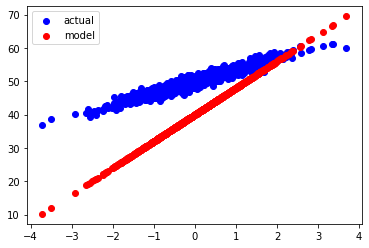

Current loss: 122.563576


In [4]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b', label = 'actual')
plt.scatter(inputs, model(inputs), c='r', label = 'model')
plt.legend()
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

### Update Weights Based on Gradient

> *Assigning blame for bad predictions and delivering justice - repeatedly and a little bit at a time*



In [5]:
 def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t: 
     current_loss = loss(outputs, model(inputs))
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

### Train the Network

In [6]:
model = Model()

# Store Some history of weights
Ws, bs = [], []
epochs = range(20)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(outputs, model(inputs))

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))

Epoch  0: W=8.00 b=40.00 loss=122.56358
Epoch  1: W=7.04 b=42.00 loss=78.41153
Epoch  2: W=6.29 b=43.60 loss=50.30076
Epoch  3: W=5.69 b=44.88 loss=32.40061
Epoch  4: W=5.22 b=45.90 loss=21.00067
Epoch  5: W=4.85 b=46.72 loss=13.73947
Epoch  6: W=4.56 b=47.37 loss=9.11382
Epoch  7: W=4.33 b=47.90 loss=6.16672
Epoch  8: W=4.15 b=48.32 loss=4.28882
Epoch  9: W=4.01 b=48.65 loss=3.09207
Epoch 10: W=3.90 b=48.92 loss=2.32931
Epoch 11: W=3.81 b=49.14 loss=1.84310
Epoch 12: W=3.74 b=49.31 loss=1.53313
Epoch 13: W=3.68 b=49.45 loss=1.33550
Epoch 14: W=3.64 b=49.56 loss=1.20948
Epoch 15: W=3.61 b=49.65 loss=1.12912
Epoch 16: W=3.58 b=49.72 loss=1.07786
Epoch 17: W=3.56 b=49.77 loss=1.04516
Epoch 18: W=3.54 b=49.82 loss=1.02431
Epoch 19: W=3.53 b=49.86 loss=1.01100


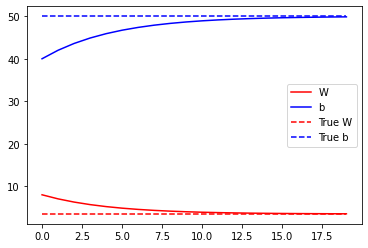

In [7]:
import matplotlib.pyplot as plt

plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()

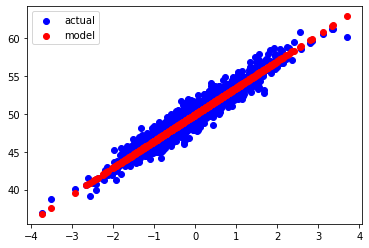

Current loss: 1.002513


In [8]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b', label = 'actual')
plt.scatter(inputs, model(inputs), c='r', label = 'model')
plt.legend()
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

## Challenge

In the module project, you will be asked to explain the logic of backpropagation and gradient descent.

## In the following two sections we'll look at batch size and learning rate hyperparameters in isolation. 
You should also know that with neural networks it is common to have gradients that are not convex (like what we saw when we applied gradient descent to linear regression). 

Due to the high complexity of these models and their nonlinearity, it is common for gradient descent to get stuck in a local minimum, but there are ways to combat this:

1) Stochastic Gradient Descent

2) More advanced Gradient-Descent-based "Optimizers" - See Stretch Goals on assignment.

However, it's important to know that recent research found some interesting relationships between batch sizes and learning rates. The best available suggestion today is to scale batch size proportionally to a learning rate:
- https://openreview.net/pdf?id=B1Yy1BxCZ
- https://papers.nips.cc/paper/8398-control-batch-size-and-learning-rate-to-generalize-well-theoretical-and-empirical-evidence.pdf

# Batch Size (Learn)

## Overview

The What - Stochastic Gradient Descent calculates an approximation of the gradient over the entire dataset by reviewing the predictions of a random sample. 

The Why - *Speed*. Calculating the gradient over the entire dataset is extremely expensive computationally. 

### Batch Size
Batches are the number of observations our model is shown to make predictions and update the weights. Batches are selected randomly during epoch. All observations are considered when passing thru an epoch at some point.

### Baseline Model

In [9]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.
X_test = X_test / 255.

X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000, 784))

In [10]:
# Our Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

def create_model(learning_rate=0.01):
  opt = SGD(lr=learning_rate)
  model = Sequential([
    Dense(64, input_dim=784, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
  ])
  model.compile(optimizer=opt, 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

## Follow Along
Let's run a series of experiments for a default, small, and large batch size.

### Default
Batch Size is 32

In [11]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [12]:
bt_default = model.fit(X_train, y_train,
                       epochs=20,
                        batch_size=32,
                       validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 2s 953us/step - loss: 1.1541 - accuracy: 0.6739 - val_loss: 0.3329 - val_accuracy: 0.9072
Epoch 2/20
1875/1875 [==============================] - 1s 676us/step - loss: 0.3346 - accuracy: 0.9035 - val_loss: 0.2711 - val_accuracy: 0.9223
Epoch 3/20
1875/1875 [==============================] - 1s 671us/step - loss: 0.2725 - accuracy: 0.9212 - val_loss: 0.2396 - val_accuracy: 0.9303
Epoch 4/20
1875/1875 [==============================] - 1s 674us/step - loss: 0.2411 - accuracy: 0.9311 - val_loss: 0.2117 - val_accuracy: 0.9398
Epoch 5/20
1875/1875 [==============================] - 1s 670us/step - loss: 0.2093 - accuracy: 0.9393 - val_loss: 0.2010 - val_accuracy: 0.9424
Epoch 6/20
1875/1875 [==============================] - 1s 671us/step - loss: 0.1905 - accuracy: 0.9454 - val_loss: 0.1747 - val_accuracy: 0.9497
Epoch 7/20
1875/1875 [==============================] - 1s 671us/step - loss: 0.1743 - accuracy: 0.9503 - val_loss: 0.1655 -

### Small Batch Size
Batch Size is 8

In [13]:
model = create_model()
bt_small = model.fit(X_train, y_train,
                     epochs=20,
                     batch_size=8,
                     validation_data=(X_test, y_test))

Epoch 1/20
7500/7500 [==============================] - 5s 632us/step - loss: 0.6451 - accuracy: 0.8113 - val_loss: 0.2127 - val_accuracy: 0.9369
Epoch 2/20
7500/7500 [==============================] - 5s 618us/step - loss: 0.2002 - accuracy: 0.9406 - val_loss: 0.1542 - val_accuracy: 0.9510
Epoch 3/20
7500/7500 [==============================] - 5s 616us/step - loss: 0.1433 - accuracy: 0.9581 - val_loss: 0.1366 - val_accuracy: 0.9593
Epoch 4/20
7500/7500 [==============================] - 5s 620us/step - loss: 0.1187 - accuracy: 0.9642 - val_loss: 0.1259 - val_accuracy: 0.9634
Epoch 5/20
7500/7500 [==============================] - 5s 618us/step - loss: 0.0967 - accuracy: 0.9711 - val_loss: 0.1183 - val_accuracy: 0.9658
Epoch 6/20
7500/7500 [==============================] - 5s 616us/step - loss: 0.0795 - accuracy: 0.9762 - val_loss: 0.0995 - val_accuracy: 0.9722
Epoch 7/20
7500/7500 [==============================] - 5s 614us/step - loss: 0.0692 - accuracy: 0.9795 - val_loss: 0.0962 -

### Large Batch Size
Batch Size is 512

In [14]:
model = create_model()
bt_large = model.fit(X_train, y_train,
                     epochs=20,
                     batch_size=512,
                     validation_data=(X_test, y_test))

Epoch 1/20
118/118 [==============================] - 1s 3ms/step - loss: 2.2262 - accuracy: 0.2074 - val_loss: 1.7713 - val_accuracy: 0.5829
Epoch 2/20
118/118 [==============================] - 0s 2ms/step - loss: 1.6166 - accuracy: 0.6469 - val_loss: 1.1266 - val_accuracy: 0.7859
Epoch 3/20
118/118 [==============================] - 0s 2ms/step - loss: 1.0324 - accuracy: 0.7928 - val_loss: 0.7656 - val_accuracy: 0.8286
Epoch 4/20
118/118 [==============================] - 0s 2ms/step - loss: 0.7333 - accuracy: 0.8286 - val_loss: 0.6046 - val_accuracy: 0.8511
Epoch 5/20
118/118 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.8478 - val_loss: 0.5216 - val_accuracy: 0.8669
Epoch 6/20
118/118 [==============================] - 0s 2ms/step - loss: 0.5282 - accuracy: 0.8603 - val_loss: 0.4689 - val_accuracy: 0.8759
Epoch 7/20
118/118 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.8705 - val_loss: 0.4330 - val_accuracy: 0.8842
Epoch 

### Visualization of Results

In [15]:
print(bt_default.history)

{'loss': [0.6817631721496582, 0.3139718174934387, 0.2657153904438019, 0.23288945853710175, 0.20764435827732086, 0.18719998002052307, 0.16989736258983612, 0.1561090350151062, 0.14446163177490234, 0.13395510613918304, 0.1250411719083786, 0.11731339246034622, 0.11001735925674438, 0.10404026508331299, 0.09806931018829346, 0.09323589503765106, 0.088544562458992, 0.08418519049882889, 0.08026927709579468, 0.07674095034599304], 'accuracy': [0.8137999773025513, 0.909600019454956, 0.9235166907310486, 0.9330666661262512, 0.9398833513259888, 0.9459999799728394, 0.9508166909217834, 0.9547333121299744, 0.9581999778747559, 0.961483359336853, 0.9638333320617676, 0.9664499759674072, 0.9686333537101746, 0.970216691493988, 0.9720666408538818, 0.9729499816894531, 0.974566638469696, 0.9757500290870667, 0.977316677570343, 0.9783333539962769], 'val_loss': [0.3329009413719177, 0.27112406492233276, 0.23960624635219574, 0.2116979956626892, 0.20102877914905548, 0.17467959225177765, 0.1655397266149521, 0.15607711

In [16]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([bt_default, bt_small, bt_large], ["32_", "8_", "512_"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result
    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.681763,0.813800,0.332901,0.9072,0,32_
1,0.313972,0.909600,0.271124,0.9223,1,32_
2,0.265715,0.923517,0.239606,0.9303,2,32_
3,0.232889,0.933067,0.211698,0.9398,3,32_
4,0.207644,0.939883,0.201029,0.9424,4,32_


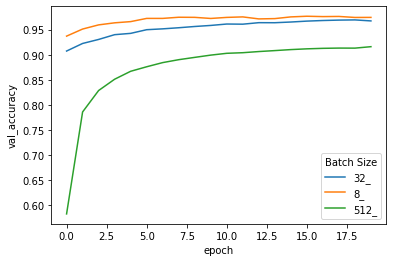

In [17]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

## Challenge

You will be expected to experiment with batch size on today's assignment.

# Learning Rate (Learn)

## Overview

Learning Rate controls the size of the update to our weights that the optimization algorithm makes. VERY IMPORTANT hyperparameter.

* Too high of a learning rate causes unstable results
* Too Low of a learning rate the model will underfit
* Goldy Locks parameters - it needs be "just right"
* Scale of 0-1

## Follow Along

Same experiment with Batch but different learning rates:
* High Learning = .75
* Default Learning = .01
* Low Learning Rate = .0001

### Default Learning Rate

In [18]:
model = create_model(learning_rate=0.01)
lr_default = model.fit(X_train, y_train,
                       epochs=20,
                       batch_size=32,
                       validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 2s 769us/step - loss: 1.1246 - accuracy: 0.6718 - val_loss: 0.3272 - val_accuracy: 0.9062
Epoch 2/20
1875/1875 [==============================] - 1s 694us/step - loss: 0.3249 - accuracy: 0.9072 - val_loss: 0.2641 - val_accuracy: 0.9231
Epoch 3/20
1875/1875 [==============================] - 1s 685us/step - loss: 0.2656 - accuracy: 0.9224 - val_loss: 0.2310 - val_accuracy: 0.9330
Epoch 4/20
1875/1875 [==============================] - 1s 694us/step - loss: 0.2280 - accuracy: 0.9332 - val_loss: 0.2129 - val_accuracy: 0.9377
Epoch 5/20
1875/1875 [==============================] - 1s 696us/step - loss: 0.2108 - accuracy: 0.9395 - val_loss: 0.1912 - val_accuracy: 0.9440
Epoch 6/20
1875/1875 [==============================] - 1s 690us/step - loss: 0.1881 - accuracy: 0.9456 - val_loss: 0.1835 - val_accuracy: 0.9461
Epoch 7/20
1875/1875 [==============================] - 1s 695us/step - loss: 0.1727 - accuracy: 0.9505 - val_loss: 0.1713 -

### High Learning Rate

In [19]:
model = create_model(learning_rate=0.75)
lr_high = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 2s 757us/step - loss: 0.8757 - accuracy: 0.7146 - val_loss: 0.2885 - val_accuracy: 0.9246
Epoch 2/20
1875/1875 [==============================] - 1s 702us/step - loss: 0.2985 - accuracy: 0.9178 - val_loss: 0.2857 - val_accuracy: 0.9277
Epoch 3/20
1875/1875 [==============================] - 1s 698us/step - loss: 0.2591 - accuracy: 0.9312 - val_loss: 0.3873 - val_accuracy: 0.8992
Epoch 4/20
1875/1875 [==============================] - 1s 699us/step - loss: 0.2462 - accuracy: 0.9354 - val_loss: 0.2535 - val_accuracy: 0.9408
Epoch 5/20
1875/1875 [==============================] - 1s 742us/step - loss: 0.2322 - accuracy: 0.9407 - val_loss: 0.2469 - val_accuracy: 0.9379
Epoch 6/20
1875/1875 [==============================] - 1s 697us/step - loss: 0.2069 - accuracy: 0.9464 - val_loss: 0.2428 - val_accuracy: 0.9430
Epoch 7/20
1875/1875 [==============================] - 1s 697us/step - loss: 0.1918 - accuracy: 0.9513 - val_loss: 0.1964 -

### Low Learning Rate

In [20]:
model = create_model(learning_rate=0.0001)
lr_low = model.fit(X_train, y_train,
                   epochs=20,
                   batch_size=32,
                   validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 2s 751us/step - loss: 2.3224 - accuracy: 0.0981 - val_loss: 2.2559 - val_accuracy: 0.1361
Epoch 2/20
1875/1875 [==============================] - 1s 688us/step - loss: 2.2357 - accuracy: 0.1517 - val_loss: 2.1793 - val_accuracy: 0.2227
Epoch 3/20
1875/1875 [==============================] - 1s 682us/step - loss: 2.1637 - accuracy: 0.2416 - val_loss: 2.1048 - val_accuracy: 0.3173
Epoch 4/20
1875/1875 [==============================] - 1s 685us/step - loss: 2.0920 - accuracy: 0.3243 - val_loss: 2.0275 - val_accuracy: 0.3883
Epoch 5/20
1875/1875 [==============================] - 1s 685us/step - loss: 2.0145 - accuracy: 0.3907 - val_loss: 1.9449 - val_accuracy: 0.4446
Epoch 6/20
1875/1875 [==============================] - 1s 683us/step - loss: 1.9311 - accuracy: 0.4421 - val_loss: 1.8565 - val_accuracy: 0.4934
Epoch 7/20
1875/1875 [==============================] - 1s 686us/step - loss: 1.8459 - accuracy: 0.4978 - val_loss: 1.7640 -

### Visualization of Results

In [21]:
import seaborn as sns
import pandas as pd

learning_rates = []

for exp, result in zip([lr_default, lr_low, lr_high], ["0.01_", "0.0001_", "0.75_"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = result
    learning_rates.append(df)

df = pd.concat(learning_rates)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,0.676717,0.813200,0.327177,0.9062,0,0.01_
1,0.307877,0.911817,0.264109,0.9231,1,0.01_
2,0.257831,0.925050,0.230975,0.9330,2,0.01_
3,0.226841,0.934433,0.212935,0.9377,3,0.01_
4,0.203484,0.940833,0.191159,0.9440,4,0.01_


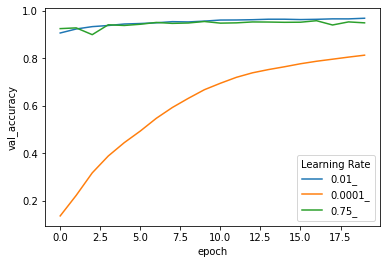

In [22]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

## Challenge

You will be expected to experiment with different learning rates today.

---